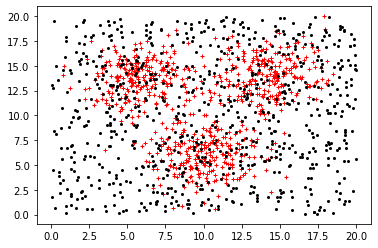

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6,14]
mean2 = [10,6]
mean3 = [14,14]
cov = [[3.5,0],[0,3.5]]

np.random.seed(50)
X = np.random.multivariate_normal(mean1,cov,int(N/6))
X = np.concatenate((X,np.random.multivariate_normal(mean2,cov,int(N/6))))
X = np.concatenate((X,np.random.multivariate_normal(mean3,cov,int(N/6))))
X = np.concatenate((X,20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.8,random_state=1)


In [20]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

In [21]:
clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train,Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train,Y_predTrain))
testAcc.append(accuracy_score(Y_test,Y_predTest))
print(trainAcc,testAcc)

[1.0] [0.6916666666666667]


In [22]:
clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train,Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train,Y_predTrain))
testAcc.append(accuracy_score(Y_test,Y_predTest))

In [23]:
clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train,Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train,Y_predTrain))
testAcc.append(accuracy_score(Y_test,Y_predTest))

[Text(0, 0, 'Random Forest'), Text(0, 0, 'Bagging'), Text(0, 0, 'AdaBoost')]

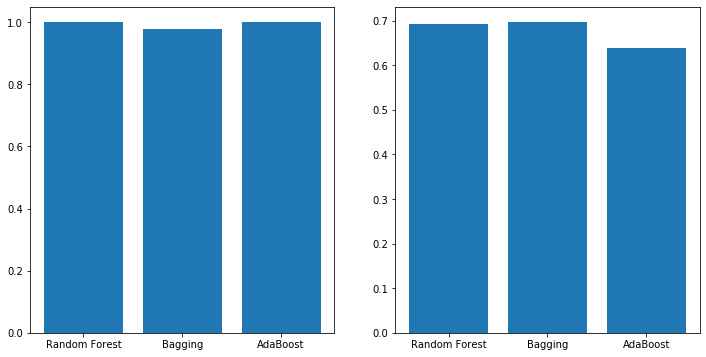

In [26]:
methods = ['Random Forest','Bagging','AdaBoost']
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.bar([1.5,2.5,3.5],trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5],testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)